In [3]:
################# Loading libraries and user input data ####################

from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os


test = True
if test:
    input_fasta_file        = "../toxo_reads/toxo1.trimmedReads.fasta"
    param_min_len           = 1500
    output_fig          = "../Visuals/hist.read_lengths.pdf"
    output_filtered_fasta   = "../Data/toxo1.size-filtered.fasta"

else:
    input_fasta_file        = sys.argv[1]
    param_min_len           = int(sys.argv[2])
    output_fig          = sys.argv[3]
    output_filtered_fasta   = sys.argv[4]

# Making Output dirs
fasta_dirname = os.path.dirname(output_filtered_fasta)
fig_dirname = os.path.dirname(output_fig)
os.makedirs(fasta_dirname, exist_ok=True)
os.makedirs(fig_dirname, exist_ok=True)

######-----------------------------------------------------------------------------------


In [4]:
################# Load, filter and save fasta file by the size of its reads ####################

raw_lens = []
filtered_lens = []
filtered_fasta = {}
# Load raw fasta file
for record in SeqIO.parse(input_fasta_file, "fasta"):
    seq_len = len(record.seq)
    raw_lens.append(seq_len)
    
    # Filter reads by size
    if seq_len >= param_min_len:
        filtered_fasta[record.id] = record.seq
        filtered_lens.append(seq_len)

# Save size filtered fasta file
with open(output_filtered_fasta, 'w') as file:
    for id, seq in filtered_fasta.items():
        file.write(f'{id}\n')
        file.write(f'{seq}\n')

######-----------------------------------------------------------------------------------


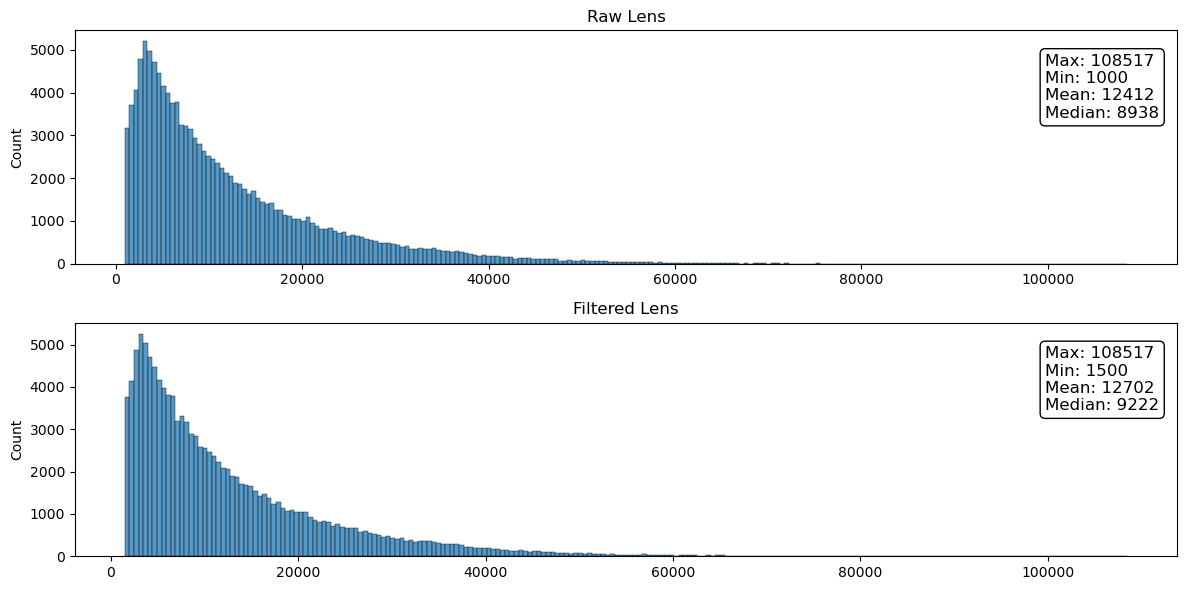

In [5]:
################# Plot histogram with reads lengths of raw and filtered fasta ####################

# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Plot the histograms
sns.histplot(raw_lens, ax=axes[0])
axes[0].set_title('Raw Lens')

sns.histplot(filtered_lens, ax=axes[1])
axes[1].set_title('Filtered Lens')

# Add annotations
def add_annotations(data, ax):
    max_val = max(data)
    min_val = min(data)
    mean_val = sum(data) / len(data)
    median = np.median(data)
    textstr = f'Max: {max_val}\nMin: {min_val}\nMean: {mean_val:.0f}\nMedian: {median:.0f}'
    ax.text(0.88, 0.90, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

add_annotations(raw_lens, axes[0])
add_annotations(filtered_lens, axes[1])

# Adjust layout
plt.tight_layout()

# Show the plot
#fig_path = os.path.join(output_fig, "hist.read_lengths.pdf")
plt.savefig(output_fig)
plt.show()
plt.close()

######-----------------------------------------------------------------------------------
